In [1]:
import warnings
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
np.random.seed(42)

In [6]:
df = pd.read_pickle('pickle/df_modeling.pkl')

In [7]:
len(df)

9115

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(['num_conflicts', 'cow_code', 'year', 'state_name',
             'num_wars', 'export_import_ratio', 'avg_hostility_level',
             'revision_pct'], axis = 1)

y = df['num_conflicts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [10]:
continuous_columns = ['num_trade_states', 'export_dollars', 'import_dollars',
                      'military_expenditure', 'military_personnel',
                      'prim_energy_consumption', 'total_pop', 'cinc_score',
                      'num_alliances', 'pre_1816_alliances', 'num_in_effect_1231_2012',
                      'defense_treaties', 'neutrality_treaties', 'nonaggression_treaties',
                      'entente_treaties', 'avg_cum_duration', 'ongoing_2010', 'leader_tenure',
                      'age_govt', 'num_transitions_ever', 'num_leadership_changes']

X_train_cont = X_train[continuous_columns]
X_train_cont = X_train_cont.reset_index()
X_train_cont.drop(['index'], axis = 1, inplace = True)

X_train_dummy = X_train.drop(continuous_columns, axis = 1)
X_train_dummy = X_train_dummy.reset_index()
X_train_dummy.drop(['index'], axis = 1, inplace = True)

X_test_cont = X_test[continuous_columns]
X_test_cont = X_test_cont.reset_index()
X_test_cont.drop(['index'], axis = 1, inplace = True)

X_test_dummy = X_test.drop(continuous_columns, axis = 1)
X_test_dummy = X_test_dummy.reset_index()
X_test_dummy.drop(['index'], axis = 1, inplace = True)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

X_train_cont_scaled = pd.DataFrame(scaler.fit_transform(X_train_cont))
X_train_cont_scaled = X_train_cont_scaled.reset_index()
X_train_cont_scaled.drop(['index'], axis = 1, inplace = True)
X_train_cont_scaled.columns = continuous_columns

X_test_cont_scaled = pd.DataFrame(scaler.transform(X_test_cont))
X_test_cont_scaled = X_test_cont_scaled.reset_index()
X_test_cont_scaled.drop(['index'], axis = 1, inplace = True)
X_test_cont_scaled.columns = continuous_columns

X_train_scaled = pd.concat([X_train_cont_scaled, X_train_dummy], axis = 1)
X_test_scaled = pd.concat([X_test_cont_scaled, X_test_dummy], axis = 1)

In [13]:
df_scaled = pd.DataFrame(X_train_scaled, columns = X_train_scaled.columns)
df_scaled.head()

,num_trade_states,export_dollars,import_dollars,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,avg_cum_duration,ongoing_2010,leader_tenure,age_govt,num_transitions_ever,num_leadership_changes,Africa,Americas,Asia,Europe,Oceania,Direct election,Indirect election,Nonelective,Elective legislature,No legislature exists,Non‐elective legislature,Appointed,Closed,Elected,All parties legally banned,Legally single party state,Multiple parties legally allowed,Elective legislature,No legislature exists,Non‐elective legislature,Multiple parties,No parties,One party,Legislature with multiple parties,No legislature or all nonpartisan,Only members from regime party,Democratic incumbent,Rules rewritten unconstitutionally,collective_leadership,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,Civilian dictatorship,Military dictatorship,Mixed (semi‐presidential) democracy,Parliamentary democracy,Presidential democracy,Royal dictatorship,transition_to_democracy,transition_to_dictatorship
0,-2.298,-0.242,-0.253,-0.166,-0.300,-0.247,-0.257,-0.272,0.491,-0.122,0.582,0.798,-0.219,0.771,0.633,-0.266,-0.053,-0.079,-0.404,-0.477,-0.415,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1.029,-0.232,-0.247,-0.166,-0.330,-0.247,-0.275,-0.296,1.419,-0.122,1.615,1.878,-0.219,1.766,1.574,-0.266,-0.053,0.164,-0.174,-0.477,-0.415,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
2,-2.409,-0.241,-0.251,-0.166,-0.324,-0.179,-0.248,-0.217,-0.293,-0.122,-0.524,-0.864,0.750,-0.224,-0.163,-0.266,-0.053,1.014,0.023,-0.477,-0.415,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.965,-0.239,-0.253,-0.165,-0.171,-0.241,-0.260,-0.247,-0.935,-0.122,-0.820,-0.864,-0.219,-0.760,-0.815,1.243,-0.053,-0.807,-0.765,-0.477,1.498,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
4,0.281,0.221,0.345,-0.134,0.044,0.465,0.536,0.238,1.276,-0.122,1.468,1.712,-0.219,1.613,1.429,-0.266,-0.053,-0.565,2.947,-0.477,-0.415,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


Instantiate LinearRegression() and fit our data to a new model.

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_train = linreg.predict(X_train_scaled)

*Is there a linear relationship between our training values and our predicted values?*

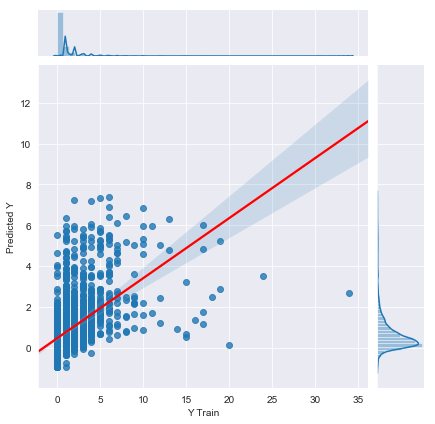

In [16]:
sns.set_style('darkgrid')

ax = sns.jointplot(x = y_train, y = y_pred_train, 
                   kind = 'reg', height = 6, ratio = 6);
ax.set_axis_labels('Y Train', 'Predicted Y')
regline = ax.ax_joint.get_lines()[0]
regline.set_color('red')

Perform cross-validation to check for over-fitting/under-fitting.

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
scores = cross_val_score(linreg, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')
print('Avg RMSE for 10 folds Cross-Val:        ', np.sqrt(-scores).mean().round(2))
print('Std Dev of RMSE for 10 folds Cross-Val: ', np.sqrt(-scores).std().round(2))

Avg RMSE for 10 folds Cross-Val:         1.37
Std Dev of RMSE for 10 folds Cross-Val:  0.27


In [19]:
from sklearn.utils import resample

In [20]:
print('Multiple Linear Regression Coefficients\nSimple Linear Regression, Polynomial Degree 1\nAlpha = 0')
print('Intercept:', linreg.intercept_.round(2))
err = np.std([linreg.fit(*resample(X_train_scaled, y_train)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linreg.coef_.round(2),
                    'error': err.round(0)}, X_train.columns)
print('Total Non-Zero Coefficients: {}\n'.format(len(linreg.coef_.round(2))))
cdf['abs_effect'] = abs(cdf['effect'])
print(cdf.sort_values(by = 'abs_effect', ascending = False))

Multiple Linear Regression Coefficients
Simple Linear Regression, Polynomial Degree 1
Alpha = 0
Intercept: 1359554308824.54
Total Non-Zero Coefficients: 66

                                                 effect             error  \
Presidential democracy               28156838972877.750 3810291798163.000   
Mixed (semi‐presidential) democracy  28156838972877.379 3810291798163.000   
Parliamentary democracy              28156838972877.379 3810291798163.000   
democratic_regime                   -26609683266681.559 5835042101337.000   
Indirect election                    -3491072050350.020 4082423753190.000   
Direct election                      -3491072050349.940 4082423753190.000   
Nonelective                          -3491072050349.670 4082423753190.000   
Civilian dictatorship                 1547155706196.090 3398758732676.000   
Military dictatorship                 1547155706195.100 3398758732676.000   
Multiple parties legally allowed      1464756102293.910 2023820274721.000

In [21]:
from sklearn import metrics

In [22]:
print('Train R^2:  ', linreg.score(X_train_scaled, y_train).round(2))
print('Train MAE: ', metrics.mean_absolute_error(y_train, y_pred_train).round(2))
print('Train MSE: ', metrics.mean_squared_error(y_train, y_pred_train).round(2))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(2))

Train R^2:   -2.8084219147260002e+19
Train MAE:  0.68
Train MSE:  1.87
Train RMSE: 1.37


### **Lasso Regression**

***Will multiple lasso regression allow for an accurate model to predict the price per pill of prescription drugs?***

In [23]:
from sklearn.linear_model import Lasso

In [24]:
linlasso = Lasso()
linlasso.fit(X_train_scaled, y_train)
y_pred_train = linlasso.predict(X_train_scaled)

In [25]:
from sklearn.model_selection import GridSearchCV

Perform cross-validation to optimize alpha for lasso model.

In [26]:
param_grid = {'alpha': [1e-5, 1e-3, 1e-1, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 2, 3, 4, 5, 6, 7, 8, 9,
                        10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 
                        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50, 60, 70, 80, 90, 1e2, 125, 130, 135, 140,
                        145, 150, 155, 165, 170, 175, 200, 1e3, 1e4]}
grid = GridSearchCV(linlasso, param_grid, cv = 15, scoring = 'neg_mean_squared_error', n_jobs = 1)
grid.fit(X_train_scaled, y_train)

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=15, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'alpha': [1e-05, 0.001, 0.1, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50, 60, 70, 80, 90, 100.0, 125, 130, 135, 140, 145, 150, 155, 165, 170, 175, 200, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [27]:
print(grid.best_params_, '\n\n', 'RMSE:', np.sqrt(-grid.best_score_))

{'alpha': 0.001} 

 RMSE: 1.3903993917013868


Create new lasso model at the optimized value of alpha.

In [28]:
linlasso = Lasso(alpha = 0.001)
linlasso.fit(X_train_scaled, y_train)
y_pred_train = linlasso.predict(X_train_scaled)
y_pred_test = linlasso.predict(X_test_scaled)

*Is there a linear relationship between our training values and our predicted values?*

Create a dataframe to print the effect/error of the current model.

In [29]:
print('Multiple Linear Regression Coefficients\nLasso Regression, Polynomial Degree 1\nAlpha = 1.4')
print('Intercept:', linlasso.intercept_.round(2))
err = np.std([linlasso.fit(*resample(X_train_scaled, y_train)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linlasso.coef_.round(2),
                    'error': err.round(2)}, X_train.columns)
print('Total Non-Zero Coefficients: {}'.format(len(cdf[cdf['effect'] != 0]['effect'].round(2))))
print('Total Zero Coefficients: {}\n'.format(len(cdf[cdf['effect'] == 0]['effect'].round(2))))
cdf['abs_effect'] = abs(cdf['effect'])
print(cdf[cdf['effect'] != 0].sort_values(by = 'abs_effect', ascending = False))

Multiple Linear Regression Coefficients
Lasso Regression, Polynomial Degree 1
Alpha = 1.4
Intercept: 0.13
Total Non-Zero Coefficients: 49
Total Zero Coefficients: 17

                                     effect  error  abs_effect
military_leader                       0.900  0.180       0.900
Military dictatorship                -0.780  0.210       0.780
communist_leader                     -0.610  0.250       0.610
royal_leader                         -0.580  0.180       0.580
military_personnel                    0.490  0.120       0.490
Legally single party state           -0.490  0.160       0.490
One party                             0.420  0.140       0.420
Asia                                  0.390  0.060       0.390
Americas                             -0.350  0.090       0.350
nominal_vs_eff_diff                   0.350  0.200       0.350
num_in_effect_1231_2012               0.300  0.090       0.300
Europe                               -0.290  0.110       0.290
avg_cum_durati

In [30]:
print('Train R^2:  ', linlasso.score(X_train_scaled, y_train).round(2))
print('Train MAE: ', metrics.mean_absolute_error(y_train, y_pred_train).round(2))
print('Train MSE: ', metrics.mean_squared_error(y_train, y_pred_train).round(2))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(2))

Train R^2:   0.29
Train MAE:  0.68
Train MSE:  1.87
Train RMSE: 1.37


### **Ridge Regression**

***Will multiple ridge regression allow for an accurate model to predict the price per pill of prescription drugs?***

In [31]:
from sklearn.linear_model import Ridge

In [32]:
linridge = Ridge()
linridge.fit(X_train_scaled, y_train)
y_pred_train = linridge.predict(X_train_scaled)
y_pred_test = linridge.predict(X_test_scaled)

Perform cross-validation to optimize alpha for ridge model.

In [33]:
param_grid = {'alpha': [1e-4, 1e-5, 1e-3, 1e-1, 1, 5, 6, 7, 8, 9, 10,
                        11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                        21, 30, 40, 50, 60, 70, 80, 90, 1e2, 125,
                        130, 135, 140, 145, 150, 155, 165, 170, 175,
                        200, 600, 690, 691, 692, 693, 694, 695, 696,
                        697, 698, 699,700, 705, 710, 800, 825, 850,
                        874, 875, 876, 877, 888, 889, 890, 891, 892,
                        893, 894, 895, 896, 897, 898, 899, 900, 1e3, 1100, 1e4]}
grid = GridSearchCV(linridge, param_grid, cv = 15, scoring = 'neg_mean_squared_error', n_jobs = 1)
grid.fit(X_train_scaled, y_train)

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=15, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'alpha': [0.0001, 1e-05, 0.001, 0.1, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 30, 40, 50, 60, 70, 80, 90, 100.0, 125, 130, 135, 140, 145, 150, 155, 165, 170, 175, 200, 600, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 705, 710, 800, 825, 850, 874, 875, 876, 877, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 1000.0, 1100, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [34]:
print(grid.best_params_, '\n\n', 'RMSE:', np.sqrt(-grid.best_score_))

{'alpha': 30} 

 RMSE: 1.3897631879455625


Create new ridge model at the optimized value of alpha.

In [35]:
linridge = Ridge(alpha = 30)
linridge.fit(X_train_scaled, y_train)
y_pred_train = linridge.predict(X_train_scaled)
y_pred_test = linridge.predict(X_test_scaled)

*Is there a linear relationship between our training values and our predicted values?*

Create a dataframe to print the effect/error of the current model.

In [36]:
print('Multiple Linear Regression Coefficients\nRIdge Regression, Polynomial Degree 1\nAlpha = 7')
print('Intercept:', linridge.intercept_.round(2))
err = np.std([linridge.fit(*resample(X_train_scaled, y_train)).coef_
              for i in range(1000)], 0)
cdf = pd.DataFrame({'effect': linridge.coef_.round(2),
                    'error': err.round(2)}, X_train.columns)
print('Total Non-Zero Coefficients: {}'.format(len(cdf[cdf['effect'] != 0]['effect'].round(2))))
print('Total Zero Coefficients: {}\n'.format(len(cdf[cdf['effect'] == 0]['effect'].round(2))))
cdf['abs_effect'] = abs(cdf['effect'])
print(cdf[cdf['effect'] != 0].sort_values(by = 'abs_effect', ascending = False))

Multiple Linear Regression Coefficients
RIdge Regression, Polynomial Degree 1
Alpha = 7
Intercept: 0.11
Total Non-Zero Coefficients: 57
Total Zero Coefficients: 9

                                     effect  error  abs_effect
communist_leader                     -0.870  0.190       0.870
nominal_vs_eff_diff                   0.740  0.170       0.740
military_leader                       0.560  0.130       0.560
military_personnel                    0.500  0.110       0.500
Asia                                  0.390  0.050       0.390
Civilian dictatorship                 0.380  0.060       0.380
Military dictatorship                -0.350  0.100       0.350
avg_cum_duration                      0.290  0.040       0.290
military_expenditure                  0.250  0.100       0.250
defense_treaties                     -0.230  0.080       0.230
export_dollars                       -0.220  0.110       0.220
Americas                             -0.210  0.050       0.210
import_dollars   

In [37]:
print('Train R^2:  ', linridge.score(X_train_scaled, y_train).round(2))
print('Train MAE: ', metrics.mean_absolute_error(y_train, y_pred_train).round(2))
print('Train MSE: ', metrics.mean_squared_error(y_train, y_pred_train).round(2))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(2))

Train R^2:   0.28
Train MAE:  0.68
Train MSE:  1.87
Train RMSE: 1.37
